In [218]:
import jieba
import json
import pandas as pd
import numpy as np

In [219]:
# 把字串全形轉半形

def strQ2B(ustring):
    ss = []
    for s in ustring:
        rstring = ""
        for uchar in s:
            inside_code = ord(uchar)
            if inside_code == 12288:  # 全形空格直接轉換
                inside_code = 32
            elif (inside_code >= 65281 and inside_code <= 65374):  # 全形字元（除空格）根據關係轉化
                inside_code -= 65248
            rstring += chr(inside_code)
        ss.append(rstring)
    return ''.join(ss)

In [221]:
# 設定繁體字典位置 & 加上擴充字典位置
jieba.set_dictionary('jieba_data/user_dict.txt.big')
jieba.load_userdict('jieba_data/user_dict.txt')

Building prefix dict from e:\vscode\DATATHON\jieba_data\user_dict.txt.big ...
Loading model from cache C:\Users\BIGDAT~1\AppData\Local\Temp\jieba.ued307eefb5ab8582ac85b28a627b761d.cache
Loading model cost 1.031 seconds.
Prefix dict has been built successfully.


In [222]:
# 載入資料

df = pd.read_excel('data/發票怪獸sample data0805.xlsx')

In [223]:
# 資料轉半形

text_list = df['product_name'].values.tolist()
text_list_strQ2B = []
for text in text_list:
    if type(text) is int:
        continue
    else:
        text_list_strQ2B.append(strQ2B(text.strip()))
print(text_list_strQ2B)

['品項名稱', '草莓奶霜雙餡夾心', '藍山咖啡CAN240', 'LCxKT點數', '孔雀香酥脆香魚大', '蓋奇巧克力', 'UCC無糖咖啡CAN185g', 'LCxKT點數', '百樂門湛藍鏤空濾嘴香', '經典原味熱狗', '保力達蠻牛維他命B飲', '小計折扣-10%', '保力達蠻牛維他命B飲', '小計折扣-10%', '紅葡萄玄米氣泡酢飲', '青梅玄米氣泡酢飲', '促銷券03', '加工促2', '保力達蠻牛維他命B飲', '小計折扣-10%', '百吉巧克力脆皮', '百家珍蘆薈醋600', '義美無糖黑豆奶', '菜類', '全國-拾榖飯(含菜)', '(專)77摩卡咖啡乳加', '咖啡季糖果任第2件6折10/10*08MU', '(專)77義式濃縮乳加', '好時黑巧克力片裝', '好時金磚杏仁黑巧克力', '好時金磚巧酥牛奶巧克力', '快樂分享好時巧克力3件99元*08QM', '哆啦點數', '津津綠蘆筍汁PET600', '金門特級高粱300ML', '紅牛點數', '杜老爺曠世奇派雪糕', '威德-in膠原蛋白', '哆啦點數', '特選紅龍果金', '光泉高鈣鮮豆漿', '咖啡專用不織布提袋(', '鮮食促', '熱美式大杯', '洗顏專科超微米潔顏乳升級版', '寵i會員點數折抵', '我的美麗日記玻尿酸極效保', '我的美麗日記大馬士革玫瑰', '我的美麗日記南極冰河醣蛋', '任3件599元', '我的美麗日記玻尿酸極效保', '我的美麗日記角鯊烯修護保', '我的美麗日記南極冰河醣蛋', '任3件599元', '95Plus無鉛', '多力多滋起司組合包54g*4入', '【113F 12095001】95無鉛汽油', '無糖傳統豆奶2L', '巧克力蛋糕小', '7折即期商品', '獨享-1大可+1中爆', '萊姆青檸綠', '折扣總計', '新早餐運動', '翡翠柳橙', '文山清茶', '士力架花生白巧克力', '快樂分享士力架買1送1-10/24*08Q', '香草大雷神巧克力風味餅乾', '美式熱咖啡(中)', '哆啦點數', '拿鐵熱咖啡(大)', 'Line活動專用(MM條碼)', 'Line大熱拿第2杯半價11/30*09G0*', '小浣熊點數', '藍山咖啡CAN240', '巧咖奶同系價第2

In [224]:
# 精確模式分詞 (cut_all=False)

seg_result_list = []
for text in text_list:
    if type(text) is int:
        continue
    else:
        seg_result = jieba.cut(text, cut_all=False)
        seg_result_list.extend(list(seg_result))
print(seg_result_list)

'大薯', '小玉湯', '#', '小玉湯', '餐', '-', '六塊', '雞', '可樂', '-', '中', '配', '-', '經典', '中薯', '餐', '-', '薯來', '牛', '冰', '綠茶', '-', '中', '配', '-', '經典', '中薯', 'A', '餐送', '蝦堡', '餐', '-', '吉事', '蛋堡', '冰', '綠茶', '-', '中', 'A', '送', '薯餅', 'BOGO', '馬鈴薯', '餅', '豬滿', '加蛋', 'A', '送豬', '滿蛋', 'BOGO', 'A', '$', '10', '小冰奶', '搖搖', '雞腿', '排', 'A', '送', '搖搖', '腿', '排', 'BOGO', '飲', '-', '豬滿', '加蛋', '$', '55', '中', '卡布奇諾', '飲', '-', '豬滿', '加蛋', '$', '55', '中', '卡布奇諾', '飲', '-', '豬滿', '加蛋', '熱咖啡', '-', '小', '二原', '腿', '排', '#', '勁辣腿', '千島', '蝦餐', '零卡', '可', '-', '中', 'A', '送', '搖搖', '腿', '排', 'BOGO', '搖搖', '雞腿', '排', '烘焙', '食品', '凱婷', ' ', '3D', '時尚', '眉彩膏', ' ', 'BR', '92', '無鉛', '折扣', '92', '無鉛', '折扣', '台', '塑化', '回饋', '冰', '玫瑰', '蜜', '香茶', '那堤', '阿里山', '烏龍茶', '(', '壺', ')', '每日', '精選', 'V', '冰', '咖啡', 'V', '杯', '零售', '四杯', '塑膠袋', '抹', '茶', '那堤', 'V', '杯', '新年', 'BAF', '麻油', '猴菇湯', '750g', '(', '揚明', ')', '文旦', '柚吸凍', '220g', '(', '豐喜', ')', '蜂蜜', '檸檬', '吸凍', '220g', '(', '豐喜', ')', '板', '豆腐', '500g', '(', '名記

In [225]:
#停用字
with open(file='jieba_data/simple_stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
print(len(stop_words))

94


In [226]:
# 經停用字選出結果

seg_stop_result_list = []
for text in text_list:
    if type(text) is int:
        continue
    else:
        seg_result = jieba.cut(text, cut_all=False)
        for term in seg_result:
            if term not in stop_words and term != ' ':
                seg_stop_result_list.append(term)
print(seg_stop_result_list)

馬爾斯', '綠', '星球', '菸', '新', '馬爾斯', '綠', '星球', '菸', '拿', '鐵', '熱咖啡', '中', '新', '馬爾斯', '綠', '星球', '菸', '新', '馬爾斯', '綠', '星球', '菸', '拿', '鐵', '熱咖啡', '中', 'AB', '無', '加糖', '優酪乳', 'PE517ml', '代收', '手續費', '純', '喫', '茶', '鮮', '柚', '綠茶', '650ml', '盒', '茶', '裏', '王青心', '烏龍', 'PET600', '泰山', '純水', 'PET700', '瑞穗', '鮮乳', '930ml', '盒', '三麗鷗', '點數', '茶葉蛋', '統一', '麥香', '綠茶', 'TP300', '泰國', 'MAMA', '綠', '咖哩', '風味', '麵', 'MAMA', '綠', '咖哩', '買', '送', '27', '0ABN', '統一', '麥香', '綠茶', 'TP300', '舒跑', '鹼性', '離子水', 'PET850', '不冰', '舒跑', '離子水', '第', '件', '10', '元', '09J9', 'Lay', "'", 'a', '樂事', '大波浪', '洋芋片', '椒', '香嫩', '雞', '40g', '代銷', '即', '１', '４', '０', '點', '貝殼', '幣', '麥香', '紅茶', 'Ｔ', 'Ｐ', '３', '０', '０', '二配', '沖繩', '黑糖', '鬆餅', '飲冰', '室', '茶', '集紅', '奶茶', '二配', '紅豆', '麵', '包', '樂多', '綠茶', '雲絲頓', '２', '２', '紅', '代銷', '即遊', 'ｅ', '卡', '１', '５', '０', '點', '安全裝置', '火石', '打火機', '美粒果', '柳橙汁', '總匯', '溏', '心蛋', '三明治', '鮮食', '促', '茶葉蛋', '銷售', '用', '茶', '裏', '王', '日式', '綠茶', '萬寶路', '硬', '盒紅', '馬爾斯', '綠', '星球', '菸', '

In [227]:
print(len(seg_result_list))
print(len(seg_stop_result_list))

5478
4516


In [228]:
# 確認各字詞數量

from collections import Counter
seg_counter = Counter(seg_result_list)
#seg_counter.most_common()

In [234]:
# 確認各字詞數量，取前10

from collections import Counter
seg_counter = Counter(seg_stop_result_list)
seg_counter.most_common(10)

[('無鉛', 44),
 ('中', 42),
 ('麵', 38),
 ('點數', 37),
 ('巧克力', 31),
 ('拿', 29),
 ('大', 28),
 ('鐵', 28),
 ('小', 27),
 ('茶', 27)]

In [241]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [244]:
# wordcloud.generate 參數是吃文字內容，以空白為文字區隔
seg_words = ' '.join(seg_stop_result_list)

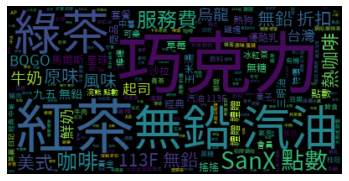

In [247]:
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()